In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

In [3]:
# 1). import the dataset and ....choose indexes for dependent and independent variable
dataset = pd.read_csv('/home/ubuntu-wasim/Documents/machineLearningMatrial/Data.csv')
#print(dataset)
x=dataset.iloc[: ,:-1].values   # [rows:rows, col:col]
y = dataset.iloc[: , -1].values     #[]  all the rows of -1 col
#print(x)
#print(y)

In [4]:

# 2). Missing data
#to replace with avg of all the salary

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan , strategy='mean')
impute.fit(x[:,1:3])
x[:,1:3]=impute.transform(x[:,1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [13]:
# 3). Encoding Categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder' , OneHotEncoder(), [0] ) ]    ,remainder='passthrough')
#now connect OneHotEncoder to matrix of feat
x = np.array(ct.fit_transform(x))   # train function except array as numpy array
print(x)


[[0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 37.0 67000.0]]


In [6]:

#labelEncoder

from sklearn.preprocessing import LabelEncoder
lab= LabelEncoder()
y = lab.fit_transform(y)
print('Label Encoding ')
print(y)

Label Encoding 
[0 1 0 0 1 1 0 1 0 1]


In [7]:
# 4). spliting the dataset into the training set and test SET
# feature Scaling (after spliting the datas
from  sklearn.model_selection  import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8 , random_state=1)
print('______________________________train_test_split_________________-')
print(x_test);
print('x_train'+"\n",x_train)
print('_____________________________y_train,y_test_________________')
print("y_train "+"\n",y_train)
print('y_test'+"\n",y_test)


______________________________train_test_split_________________-
[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
x_train
 [[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
_____________________________y_train,y_test_________________
y_train 
 [0 1 0 0 1 1 0 1]
y_test
 [0 1]


_______________________feature Scalling______________________
x_train : 
 [[-0.19159184 -1.07812594]
 [-0.01411729 -0.07013168]
 [ 0.56670851  0.63356243]
 [-0.30453019 -0.30786617]
 [-1.90180114 -1.42046362]
 [ 1.14753431  1.23265336]
 [ 1.43794721  1.57499104]
 [-0.74014954 -0.56461943]]
x_test : 
 [[-1.46618179 -0.9069571 ]
 [-0.44973664  0.20564034]]
AxesSubplot(0.125,0.125;0.62x0.755)


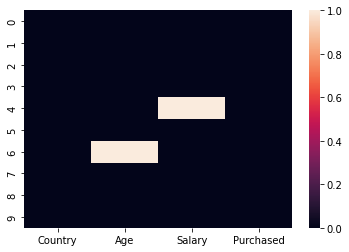

In [8]:
# 5). feature Scalling
print("_______________________feature Scalling______________________")
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train[: , 3:])
x_test = sc.transform(x_test[ : , 3:])
print("x_train : "+"\n",x_train)
print("x_test : "+"\n",x_test)

print(sea.heatmap(dataset.isnull()))